In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:
    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [4]:

import os
import keras
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding3D , BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import Input


In [5]:
batch_size = 4
img_height = 200
img_width = 200
NUM_CLASSES = 2

In [6]:
import pathlib
data_dir = r"C:\Users\kuric\Desktop\AI Camp\Code\Project_back\Snake_Images\train"
data_dir = pathlib.Path(data_dir)

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1772


In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.6,
    subset="training",
    seed=123,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.4,
    subset="validation",
    seed=123,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1775 files belonging to 2 classes.
Using 710 files for training.
Found 1775 files belonging to 2 classes.
Using 710 files for validation.


In [9]:

# def plots(ims, figsize=(12,12), rows=1, interp=False, titles=None):
#     if type(ims[0]) is np.ndarray:
#         ims = np.array(ims).astype(np.uint8)
#         if (ims.shape[-1] != 3):
#             ims = ims.transpose((0,2,3,1))
#     f = plt.figure(figsize=figsize)
#     cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1

#     for i in range(len(ims)):
#         sp = f.add_subplot(cols, rows, i+1)
#         sp.axis('Off')
#         if titles is not None:
#             sp.set_title(titles[i], fontsize=12)
#         plt.imshow(ims[i], interpolation=None if interp else 'none')

  
# #Images Classes with index
# print(train_generator.class_indices)
# for i in range(14):
# #Check the training set
#     imgs, labels = next(train_generator)
# #Images are shown in the output
#     plots(imgs, titles=labels)
    


# NUM_CLASSES = len(train_generator.class_indices) ## set NUM_CLASSES
# print("Classes = {}".format(NUM_CLASSES))


In [10]:
from keras.applications import xception
from tensorflow.keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D, Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.models import Model

model_name = "Binary_Resnet"

model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                    input_shape=(img_height,img_width,3),
                    pooling='avg',classes=NUM_CLASSES,
                    weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False


model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

learningRate = 0.00001
loss_function = "categorical_crossentropy"
model.compile(optimizer=Adam(learning_rate=learningRate),
               loss=loss_function,
               metrics=['accuracy'])

################################################
nb_epochs=100
################################################

In [11]:
# resnet_model.add(Flatten())
# resnet_model.add(Dense(512, activation='relu'))
# resnet_model.add(Dense(NUM_CLASSES, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 24,637,826
Trainable params: 1,050,114
Non-trainable params: 23,587,712
_________________________________________________________________


In [13]:
# #  Train  with backup h5 every epoch. #####################


# checkpoint_path = r"./ModelSaving/"+modelName+"-{epoch:04d}.h5"
# checkpoint_dir = os.path.dirname(checkpoint_path)
# cp_callback = tf.keras.callbacks.ModelCheckpoint(
#     checkpoint_path, verbose=1, save_weights_only=False,
#     # Save weights, every epoch.
#     save_freq='epoch'
# )
# model.save(checkpoint_path.format(epoch=0))
# vg = validation_generator
# history = model.fit( train_generator, validation_data=vg ,epochs=nb_epochs, callbacks = [cp_callback])

In [14]:
history = model.fit( train_ds, validation_data=val_ds ,epochs=nb_epochs )

Epoch 1/100
178/178 [==============================] - 9s 25ms/step - loss: 0.7172 - accuracy: 0.6000 - val_loss: 0.6062 - val_accuracy: 0.6521
Epoch 2/100
178/178 [==============================] - 4s 21ms/step - loss: 0.5664 - accuracy: 0.7254 - val_loss: 0.5519 - val_accuracy: 0.7014
Epoch 3/100
178/178 [==============================] - 4s 21ms/step - loss: 0.4922 - accuracy: 0.7775 - val_loss: 0.5415 - val_accuracy: 0.6986
Epoch 4/100
178/178 [==============================] - 4s 21ms/step - loss: 0.4381 - accuracy: 0.8127 - val_loss: 0.5073 - val_accuracy: 0.7155
Epoch 5/100
178/178 [==============================] - 4s 21ms/step - loss: 0.3960 - accuracy: 0.8521 - val_loss: 0.4971 - val_accuracy: 0.7352
Epoch 6/100
178/178 [==============================] - 4s 22ms/step - loss: 0.3642 - accuracy: 0.8662 - val_loss: 0.4773 - val_accuracy: 0.7479
Epoch 7/100
178/178 [==============================] - 4s 22ms/step - loss: 0.3346 - accuracy: 0.8859 - val_loss: 0.4702 - val_accuracy:

178/178 [==============================] - 4s 23ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 0.4553 - val_accuracy: 0.8169
Epoch 58/100
178/178 [==============================] - 4s 22ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.4566 - val_accuracy: 0.8169
Epoch 59/100
178/178 [==============================] - 4s 23ms/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 0.4591 - val_accuracy: 0.8155
Epoch 60/100
178/178 [==============================] - 4s 22ms/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.4617 - val_accuracy: 0.8141
Epoch 61/100
178/178 [==============================] - 4s 22ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.4658 - val_accuracy: 0.8155
Epoch 62/100
178/178 [==============================] - 4s 23ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.4663 - val_accuracy: 0.8183
Epoch 63/100
178/178 [==============================] - 4s 23ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.4705 - val_accuracy: 0.816

Model = Binary_Resnet
Epochs = 100
Image Size = 200
Batch = 4
learningRate = 1e-05


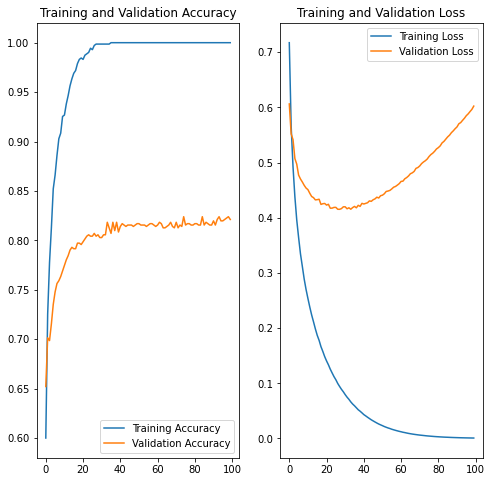

In [15]:
import os
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(nb_epochs)


print("Model = "+model_name)
print("Epochs = {}".format(nb_epochs))
print("Image Size = {}".format(img_width))
print("Batch = {}".format(batch_size))
print("learningRate = {}".format(learningRate))
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

#####  use this  to save train graph as png #####################
from datetime import datetime
dt = datetime.now()
ts = datetime.timestamp(dt)
date_time = datetime.fromtimestamp(ts)
str_date_time = date_time.strftime("%d-%m-%Y_%H-%M")
graph_path = r'./experimentData/graph'
experiment_path = r'./experimentData'
if( not (os.path.exists(experiment_path)) ) :
    os.mkdir(experiment_path)
if( not (os.path.exists(graph_path)) ) :
    os.mkdir(graph_path)
plt.savefig(graph_path+'/'+str_date_time+".png")  
#####  use this  to save train graph as png #####################

plt.show()





In [16]:
model.save(r"./ModelSaving/FinalModel_"+model_name+".h5")

NameError: name 'modelName' is not defined

In [ ]:
import pandas as pd
import os

from datetime import datetime
dt = datetime.now()
ts = datetime.timestamp(dt)
date_time = datetime.fromtimestamp(ts)
str_date_time = date_time.strftime("%d/%m/%Y, %H:%M")



############################# List that var should be defined   
############################# รายชื่อตัวแปร ที่ควรสร้าง และใส่ค่า 
varList = {"model_name",   ### name of model
           "nb_epochs",     ### number of epochs
           "batch_size",    ###  batch size
           "learningRate",  ### learning rate
           "accuracy",       ###  accuracy of model
           "val_accuracy",  ### val_accuracy  of model
           "loss",          ### loss  of model
           "val_loss",      ### val_loss  of model
           "loss_function", ### lossfunction name    Must be str
           "graph_path",    ###  path to graph dir
           "exp_dataset",  ###  explain about dataset
           "other_comment"}  ###  option  for comment
#############################





pathDir = r'./experimentData'
path = r'./experimentData/Experiment.csv'

ExpDict = {
            'Date': [],
            'ModelName': [],
            'Epochs' : [],
            'ImageSize' : [],
            'Batch': [],
            'LearningRate' : [],
            'Accuracy' : [],
            'valAccuracy': [],
            'loss' : [],
            'valLoss' : [],
            'lossFunction' : [],
            'GraphPath' : [],
            'ExpDataSet' : [],
            'otherComment' : []
             }

if(not (os.path.exists(path))) :
    dt = pd.DataFrame(ExpDict)
    if( not (os.path.exists(pathDir)) ) :
            os.mkdir(pathDir)
    dt.to_csv(path,na_rep='',float_format='%.2f',index=False)

expExel = pd.read_csv(path)

for var in varList :
    if not(var in globals()):
        exec(var + " = ''")

        
ExpDict["Date"] = str_date_time
ExpDict["ModelName"] = model_name
ExpDict["Epochs"] = str(nb_epochs)
if ("img_height" in globals()) and  ("img_width" in globals()):
    ExpDict["ImageSize"] = str("HeightWidth = {}*{}".format(img_height,img_width))
elif ("img_size" in globals()):
    ExpDict["ImageSize"] = str("ImageSize = {}".format(img_size))
else :
    ExpDict["ImageSize"] = ""
ExpDict["Batch"] = str(batch_size)
ExpDict["LearningRate"] = str(learningRate)
ExpDict["Accuracy"] = str(acc)
ExpDict["valAccuracy"] = str(val_acc)
ExpDict["loss"] = str(loss)
ExpDict["valLoss"] = str(val_loss)
ExpDict["lossFunction"] = loss_function
ExpDict["GraphPath"] = graph_path
ExpDict["ExpDataSet"] = exp_dataset
ExpDict["otherComment"] = other_comment





In [ ]:
###  บันทึกทับลง exel
expExel = expExel.append(ExpDict,ignore_index=True)
expExel.to_csv(path,na_rep='',float_format='%.2f',index=False)